
# Chapeter 7: Word Embedding



In [27]:
# loading required libaries
from gensim.models import KeyedVectors
import numpy as np
from scipy.spatial.distance import cosine
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import  dendrogram, linkage
import matplotlib.pyplot as plt
from  sklearn.manifold import TSNE
import pandas as pd 
from scipy.stats import  spearmanr

In [2]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


In [3]:
print(len(model))# Number of word vectors in the model

3000000


In [4]:
# Dimensionality of each word vector
vector_size = model.vector_size
print(vector_size)

300


 Task 60: Print out the word vector of the term "United States"

In [5]:
vector_united_states = model['United_States']
print("vector for 'United States'", vector_united_states)

vector for 'United States' [-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-0

## 61 Word similarities
Compute the cosine similarity between “United States” and “U.S.”Compute the cosine similarity between “United States” and “U.S.”

In [6]:
similarity_us_usa = 1- cosine(model['United_States'], model['U.S.'])
print("Cosine Similarities between 'United States' and 'U.S.' :" , similarity_us_usa)
                                                            

Cosine Similarities between 'United States' and 'U.S.' : 0.7310773730278015


## 62. Top-10 most similar words
Find the top-10 words that have the highest cosine similarity with the word “United States” and print out the similarity score.62. 

In [7]:
similar_words = model.similar_by_word('United_States', topn=10)
# print("Top-10 words most similar to 'United States :'")
print(similar_words)


[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370987892151), ('United_Sates', 0.7400724291801453), ('U.S.', 0.7310774326324463), ('theUnited_States', 0.6404393911361694), ('America', 0.6178410053253174), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.601906955242157)]


In [8]:
print(type(similar_words))

<class 'list'>


In [9]:
for word, score in similar_words:
    print(f"{word}:{score}")

Unites_States:0.7877248525619507
Untied_States:0.7541370987892151
United_Sates:0.7400724291801453
U.S.:0.7310774326324463
theUnited_States:0.6404393911361694
America:0.6178410053253174
UnitedStates:0.6167312264442444
Europe:0.6132988929748535
countries:0.6044804453849792
Canada:0.601906955242157


## 63. Analogy based on the additive compositionPermalink
Subtract the vector of “Madrid” from the vector of “Spain” and then add the vector of “Athens”. Compute the top-10 most similar words with the output vector.63. Analogy based on the additive compositionPermalink
Subtract the vector of “Madrid” from the vector of “Spain” and then add the vector of “Athens”. Compute the top-10 most similar words with the output vector.

In [10]:
analogy_vector = (model['Spain']-model['Madrid'] )+ model['Athens']
similar_words_analogy = model.similar_by_vector(analogy_vector , topn =10)
print("top-10 words for the analogy 'Spain -Madrid +Athens':")
for word , score in similar_words_analogy:
    print(f"{word}:{score}")
          

top-10 words for the analogy 'Spain -Madrid +Athens':
Athens:0.7528455853462219
Greece:0.6685472130775452
Aristeidis_Grigoriadis:0.5495778322219849
Ioannis_Drymonakos:0.5361457467079163
Greeks:0.5351786017417908
Ioannis_Christou:0.5330225825309753
Hrysopiyi_Devetzi:0.5088489055633545
Iraklion:0.5059264302253723
Greek:0.5040615797042847
Athens_Greece:0.5034108757972717


## 64. Analogy data experiment
Download word analogy evaluation dataset. Compute the vector as follows: vec(word in second column) - vec(word in first column) + vec(word in third column). From the output vector, (1) find the most similar word and (2) compute the similarity score with the word. Append the most similar word and its similarity to each row of the downloaded file.


In [ ]:
import urllib.request
from gensim.models import KeyedVectors
from multiprocessing import Pool, cpu_count

# Download analogy dataset
url = 'http://download.tensorflow.org/data/questions-words.txt'
urllib.request.urlretrieve(url, 'questions-words.txt')

 #Function to process each analogy
def process_analogy(line):
    word1, word2, word3, _ = line.split()
    if word1 in model and word2 in model and word3 in model:
        vector = model[word2] - model[word1] + model[word3]
        most_similar = model.similar_by_vector(vector, topn=1)[0]
        return f"{line.strip()} {most_similar[0]} {most_similar[1]}\n"
    else:
        return f"{line.strip()} None None\n"

# Function to process a chunk of lines
def process_chunk(lines):
    return [process_analogy(line) for line in lines if not line.startswith(':')]

# Load the dataset and split it into chunks
def load_and_split_dataset(file_path, chunk_size=100):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    chunks = [lines[i:i + chunk_size] for i in range(0, len(lines), chunk_size)]
    return chunks

# Process the dataset in parallel
def process_dataset_in_parallel(file_path, chunk_size=100, num_workers=4):
    chunks = load_and_split_dataset(file_path, chunk_size)
    
    with Pool(num_workers) as pool:
        results = pool.map(process_chunk, chunks)
    
    output_lines = []
    for chunk in results:
        output_lines.extend(chunk)
    
    return output_lines

# Process the dataset and write the output to a file
output_lines = process_dataset_in_parallel('questions-words.txt', chunk_size=100, num_workers=cpu_count())

# Write the results to a file
with open('questions-words-processed.txt', 'w') as file:
    file.writelines(output_lines)

print("Processing complete.")

## I tried different methods, including parallel processing, but my laptop didn't work well with any method due to its processing power. Therefore, I am unable to complete task 64. 

In [11]:
import pandas as pd
from scipy.stats import spearmanr

# # Download WordSimilarity-353 dataset
# url = 'http://www.cs.technion.ac.il/~gabr/resources/data/wordsim353/wordsim353.zip'
# urllib.request.urlretrieve(url, 'wordsim353.zip')

# # Extract and load the dataset
# import zipfile
# with zipfile.ZipFile('wordsim353.zip', 'r') as zip_ref:
#     zip_ref.extractall()

similarity_data = pd.read_csv('combined.csv')

# Compute similarity using word vectors
similarities = []
for index, row in similarity_data.iterrows():
    word1, word2 = row['Word 1'], row['Word 2']
    if word1 in model and word2 in model:
        sim = model.similarity(word1, word2)
        similarities.append(sim)
    else:
        similarities.append(None)

similarity_data['Vector Similarity'] = similarities

# Drop rows with missing values
similarity_data = similarity_data.dropna()

# Compute Spearman's rank correlation coefficient
human_similarity = similarity_data['Human (mean)']
vector_similarity = similarity_data['Vector Similarity']
correlation, _ = spearmanr(human_similarity, vector_similarity)
print("Spearman's rank correlation coefficient:", correlation)


Spearman's rank correlation coefficient: 0.7000166486272194


## 67. k-means clustering
Extract the word vectors of the country names. Apply k-means clustering where k=5

In [21]:
# List of country names
countries = ['France', 'Germany', 'Italy', 'Spain', 'United_Kingdom', 'Canada', 'Australia', 'China', 'India', 'Brazil']

# Extract word vectors for the countries
country_vectors = [model[country] for country in countries if country in model]

# Apply k-means clustering with k=5
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(country_vectors)

# Print the clusters
for i in range(5):
    cluster = [countries[j] for j in range(len(countries)) if kmeans.labels_[j] == i]
    print(f"Cluster {i+1}: {cluster}")



Cluster 1: ['United_Kingdom', 'Canada']
Cluster 2: ['Brazil']
Cluster 3: ['China', 'India']
Cluster 4: ['France', 'Germany', 'Italy', 'Spain']
Cluster 5: ['Australia']


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 68. Ward’s method clustering
Apply hierarchical clustering to the word vectors of the country names. Use Ward’s method for the distance metric between two clusters. Visualize the clustering result as the dendrogram.

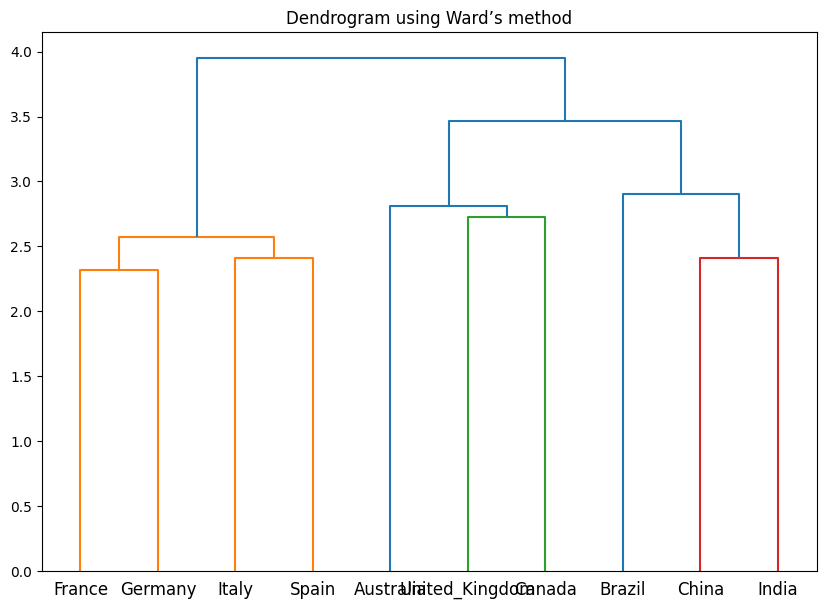

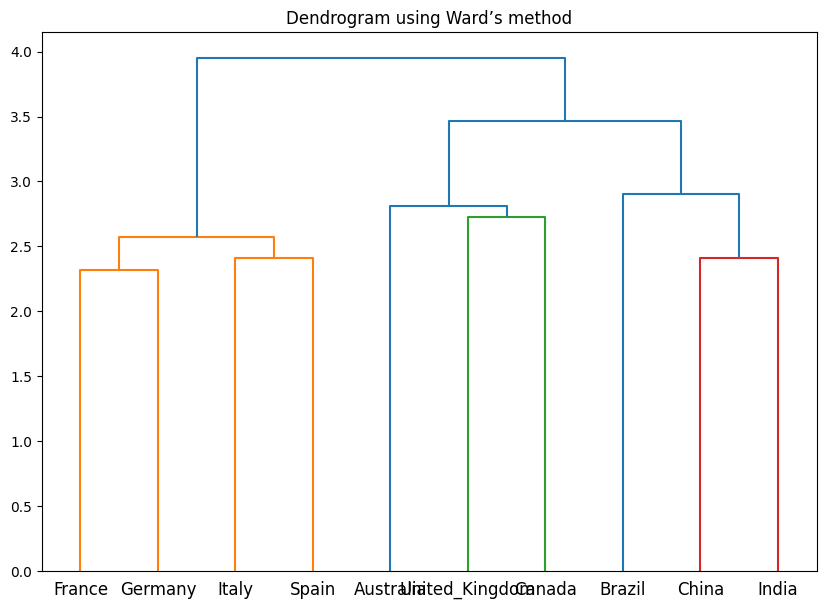

In [22]:
# Apply hierarchical clustering using Ward’s method
linked = linkage(country_vectors, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=countries)
plt.title('Dendrogram using Ward’s method')
plt.show()# Apply hierarchical clustering using Ward’s method
linked = linkage(country_vectors, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=countries)
plt.title('Dendrogram using Ward’s method')
plt.show()

## 69. t-SNE VisualizationPermalink
Visualize the word vector space of the country names by t-SN

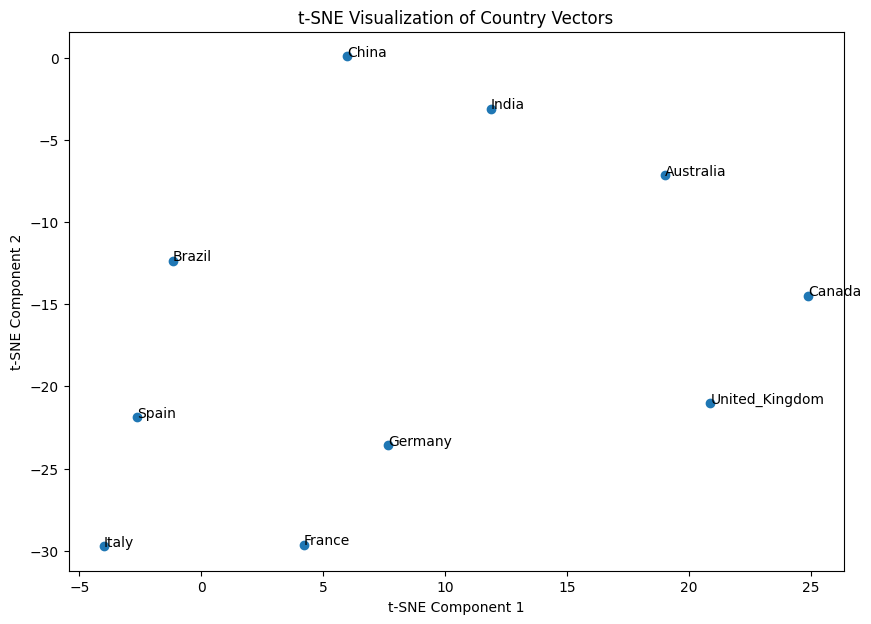

In [26]:


# Convert country_vectors list to NumPy array
country_vectors_array = np.array(country_vectors)

# Apply t-SNE to reduce dimensions with a lower perplexity value
tsne = TSNE(n_components=2, perplexity=5, random_state=0)  # Adjust perplexity as needed
country_vectors_2d = tsne.fit_transform(country_vectors_array)

# Plot the t-SNE result
plt.figure(figsize=(10, 7))
plt.scatter(country_vectors_2d[:, 0], country_vectors_2d[:, 1])
for i, country in enumerate(countries):
    plt.annotate(country, (country_vectors_2d[i, 0], country_vectors_2d[i, 1]))
plt.title('t-SNE Visualization of Country Vectors')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()